In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
#import data
file = 'myopia.csv'
myopic_df = pd.read_csv(file)
myopic_df.head()

AGE  SPHEQ         AL    ACD     LT    VCD  SPORTHR  READHR  COMPHR  \
0    6 -0.052  21.889999  3.690  3.498  14.70       45       8       0   
1    6  0.608  22.379999  3.702  3.392  15.29        4       0       1   
2    6  1.179  22.490000  3.462  3.514  15.52       14       0       2   
3    6  0.525  22.200001  3.862  3.612  14.73       18      11       0   
4    5  0.697  23.290001  3.676  3.454  16.16       14       0       0   

   STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  MYOPIC  
0        0    10         34      1      1       1  
1        1     7         12      1      1       0  
2        0    10         14      0      0       0  
3        0     4         37      0      1       1  
4        0     4          4      1      0       0

In [3]:
#prepare data for X,y; remove myopic from dataset
X = myopic_df.drop(['MYOPIC'], axis=1)


In [4]:
#setting up scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_scaled.shape

(618, 14)

In [6]:
#PCA
pca = PCA(n_components=0.90)
principal_components = pca.fit_transform(X_scaled)

In [7]:
principal_components.shape

(618, 10)

In [8]:
sum(pca.explained_variance_ratio_)

0.9187361702915184

In [9]:
#setting up t-SNE
tsne = TSNE(learning_rate=250, perplexity=50)
tsne_data = tsne.fit_transform(principal_components)


/Users/ironman616/opt/anaconda3/envs/PythonData38b/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [10]:
tsne_data.shape

(618, 2)

In [11]:
X = tsne_data[:,0]
y = tsne_data[:,1]

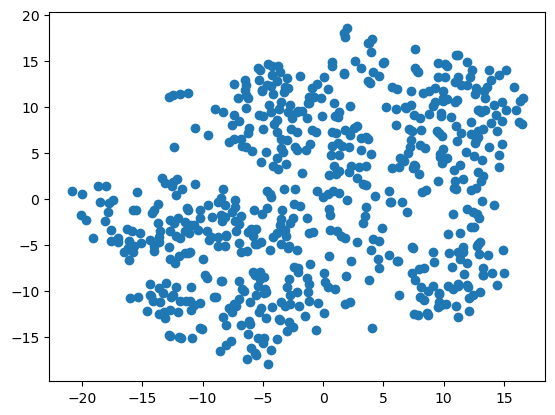

In [12]:
plt.scatter(X,y)
plt.show()

In [13]:
principal_components.shape

(618, 10)

In [20]:
#for loop to find value of k
inertia = []
k = list(range(1,11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

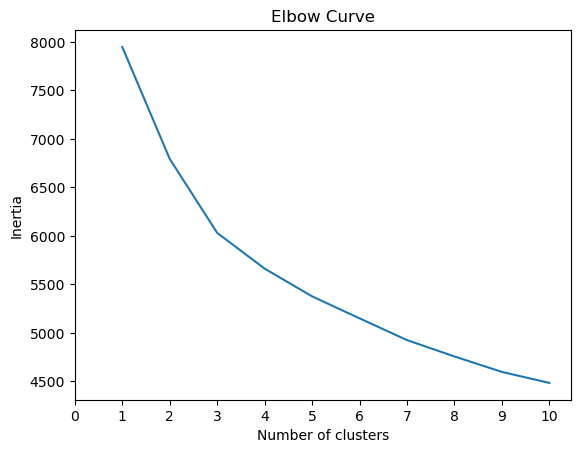

In [26]:
#elbow plot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
#K-MEANS DATAFRAME
km_df = pd.DataFrame(data=principal_components)

In [23]:
km_df

0         1         2         3         4         5         6  \
0    0.535503  1.145004 -1.385019  0.116006 -3.226691 -1.928459 -1.958892   
1   -0.624706 -1.575786 -0.794253  1.156287  0.292256  0.349060 -0.455206   
2   -0.933479 -0.717076  0.820150 -1.547638  0.173941  0.272783  0.025821   
3    0.106354  1.192475 -0.024441  1.507469 -2.356836 -0.023139  0.236418   
4   -0.388503 -2.839655 -0.229767 -0.622510  0.271458 -0.928956  0.537900   
..        ...       ...       ...       ...       ...       ...       ...   
613 -0.237547  1.146547 -1.546054 -0.248834  2.326683 -0.202403  0.084104   
614 -0.649011 -1.796952 -0.823592  0.564878  0.134282  0.348639 -0.174354   
615 -0.890082 -2.308005  0.268102  0.262770  0.231606  0.566061 -0.328287   
616 -1.124000  0.451890  0.001659 -0.847089 -0.143347 -0.414353 -0.448120   
617 -0.691534 -0.737046 -1.052900 -0.502772 -0.882590 -0.231183 -1.447594   

            7         8         9  
0   -1.922997  0.026753  0.178144  
1    0.285332  0.689683 -0.557031  
2   -0.030817 -0.431499  0.013336  
3   -1.717109 -1.230785 -0.703400  
4   -1.301787  0.279007  0.631183  
..        ...       ...       ...  
613  0.705501 -0.854993  0.736996  
614  0.252875  1.022202 -0.544105  
615 -0.489877  1.822691  0.081777  
616  0.239685 -1.592822 -1.014581  
617 -0.273804  0.946161  0.495797  

[618 rows x 10 columns]

In [24]:
# Initialize the K-Means model
model = KMeans(n_clusters=3, random_state=5)

In [25]:
# Fit the model
model.fit(km_df)

KMeans(n_clusters=3, random_state=5)

In [ ]:
# Predict clusters
predictions = model.predict(km_df)

In [ ]:
# Add the predicted class columns
km_df["class"] = model.labels_
km_df.head()

In [ ]:
df_tsne.shape

In [ ]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [ ]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=label)
plt.show()